<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/categories_As_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment to show usefulness of Categorical Embeddings

In [ ]:
# Last amendment: 1st November, 2021
# My folder: /home/ashok/Documents/keras Functional Models-Advanced
# VM: lubuntu_deeplearning_II.7z
# Ref: https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#      Data: https://www.kaggle.com/contactprad/bike-share-daily-data

## Summary of techniques  [Transforming Categorical Data](https://developers.google.com/machine-learning/data-prep/transform/transform-categorical)  

OHE, Hashing and Embeddings

### OHE

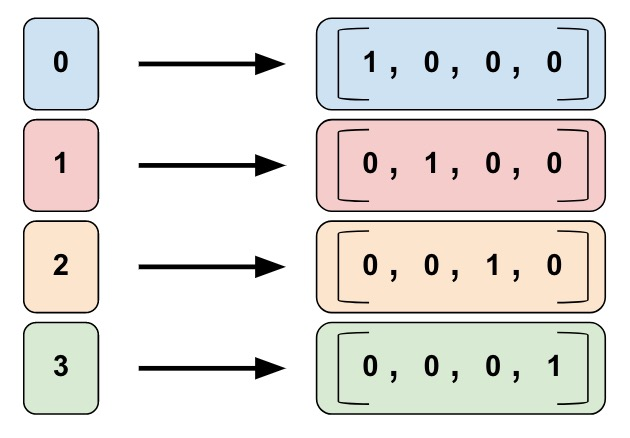

### Conversion of Categories to dense matrix

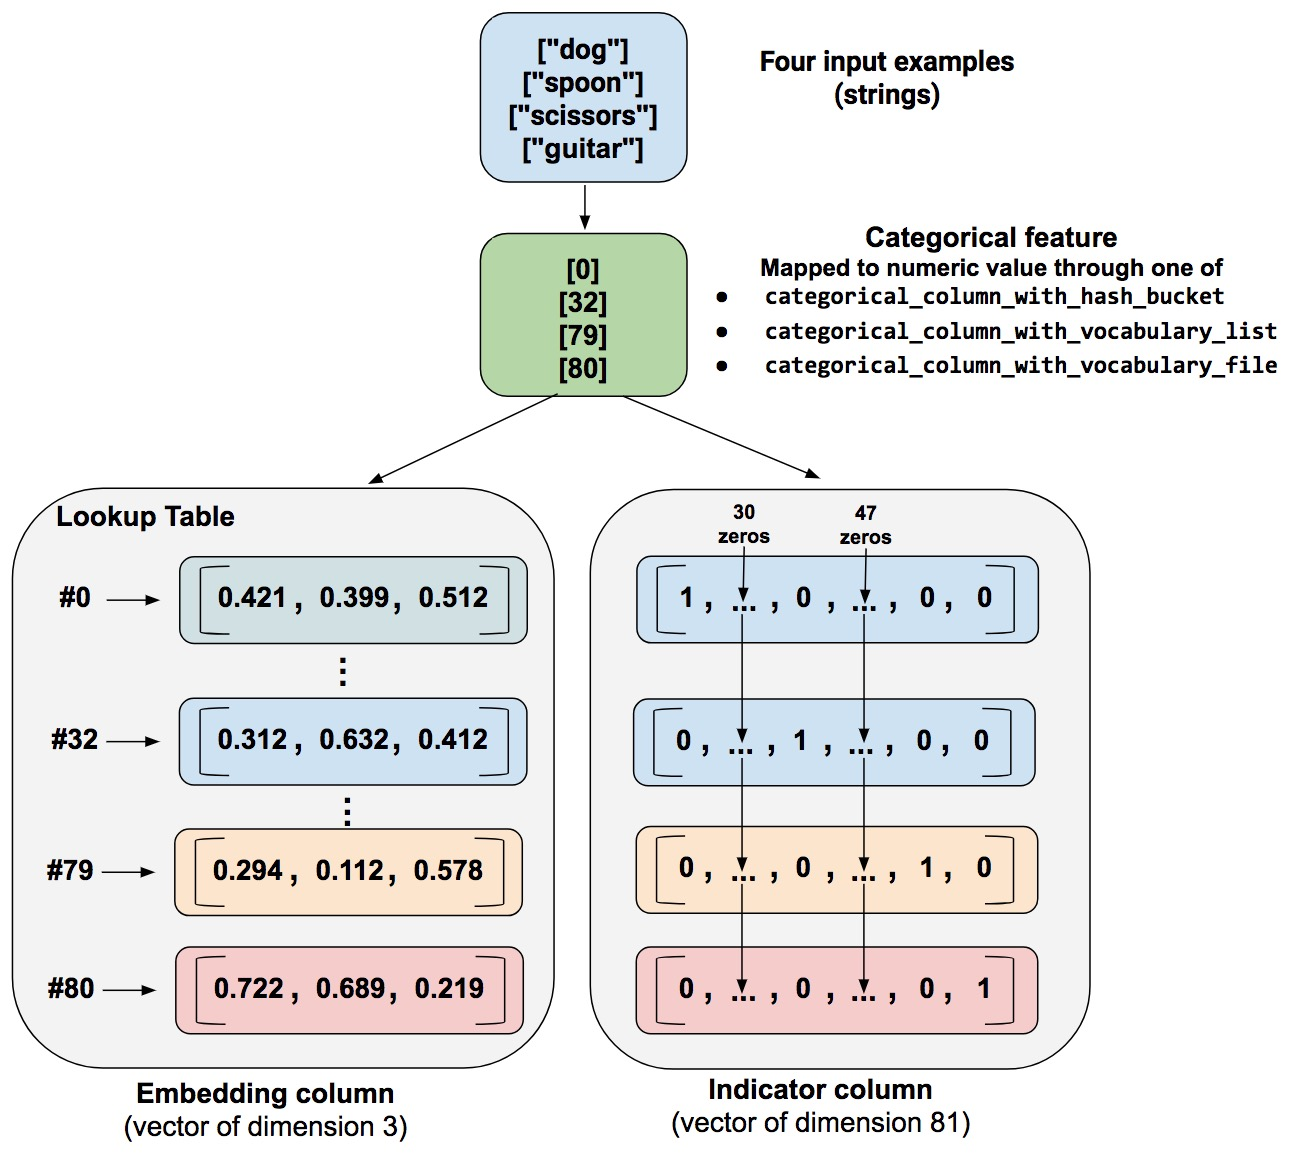

### Categorical embedding may display relationships

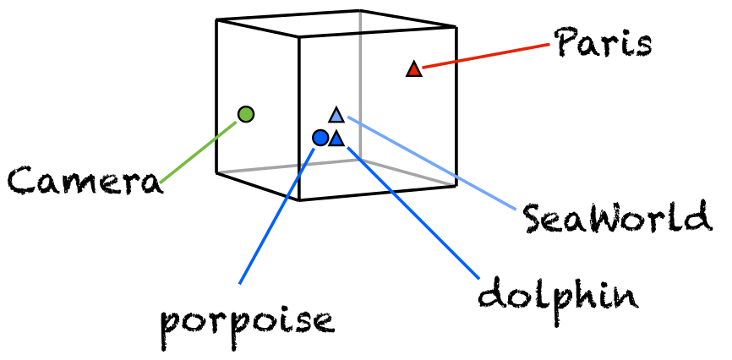

### How categorical embeddings are used

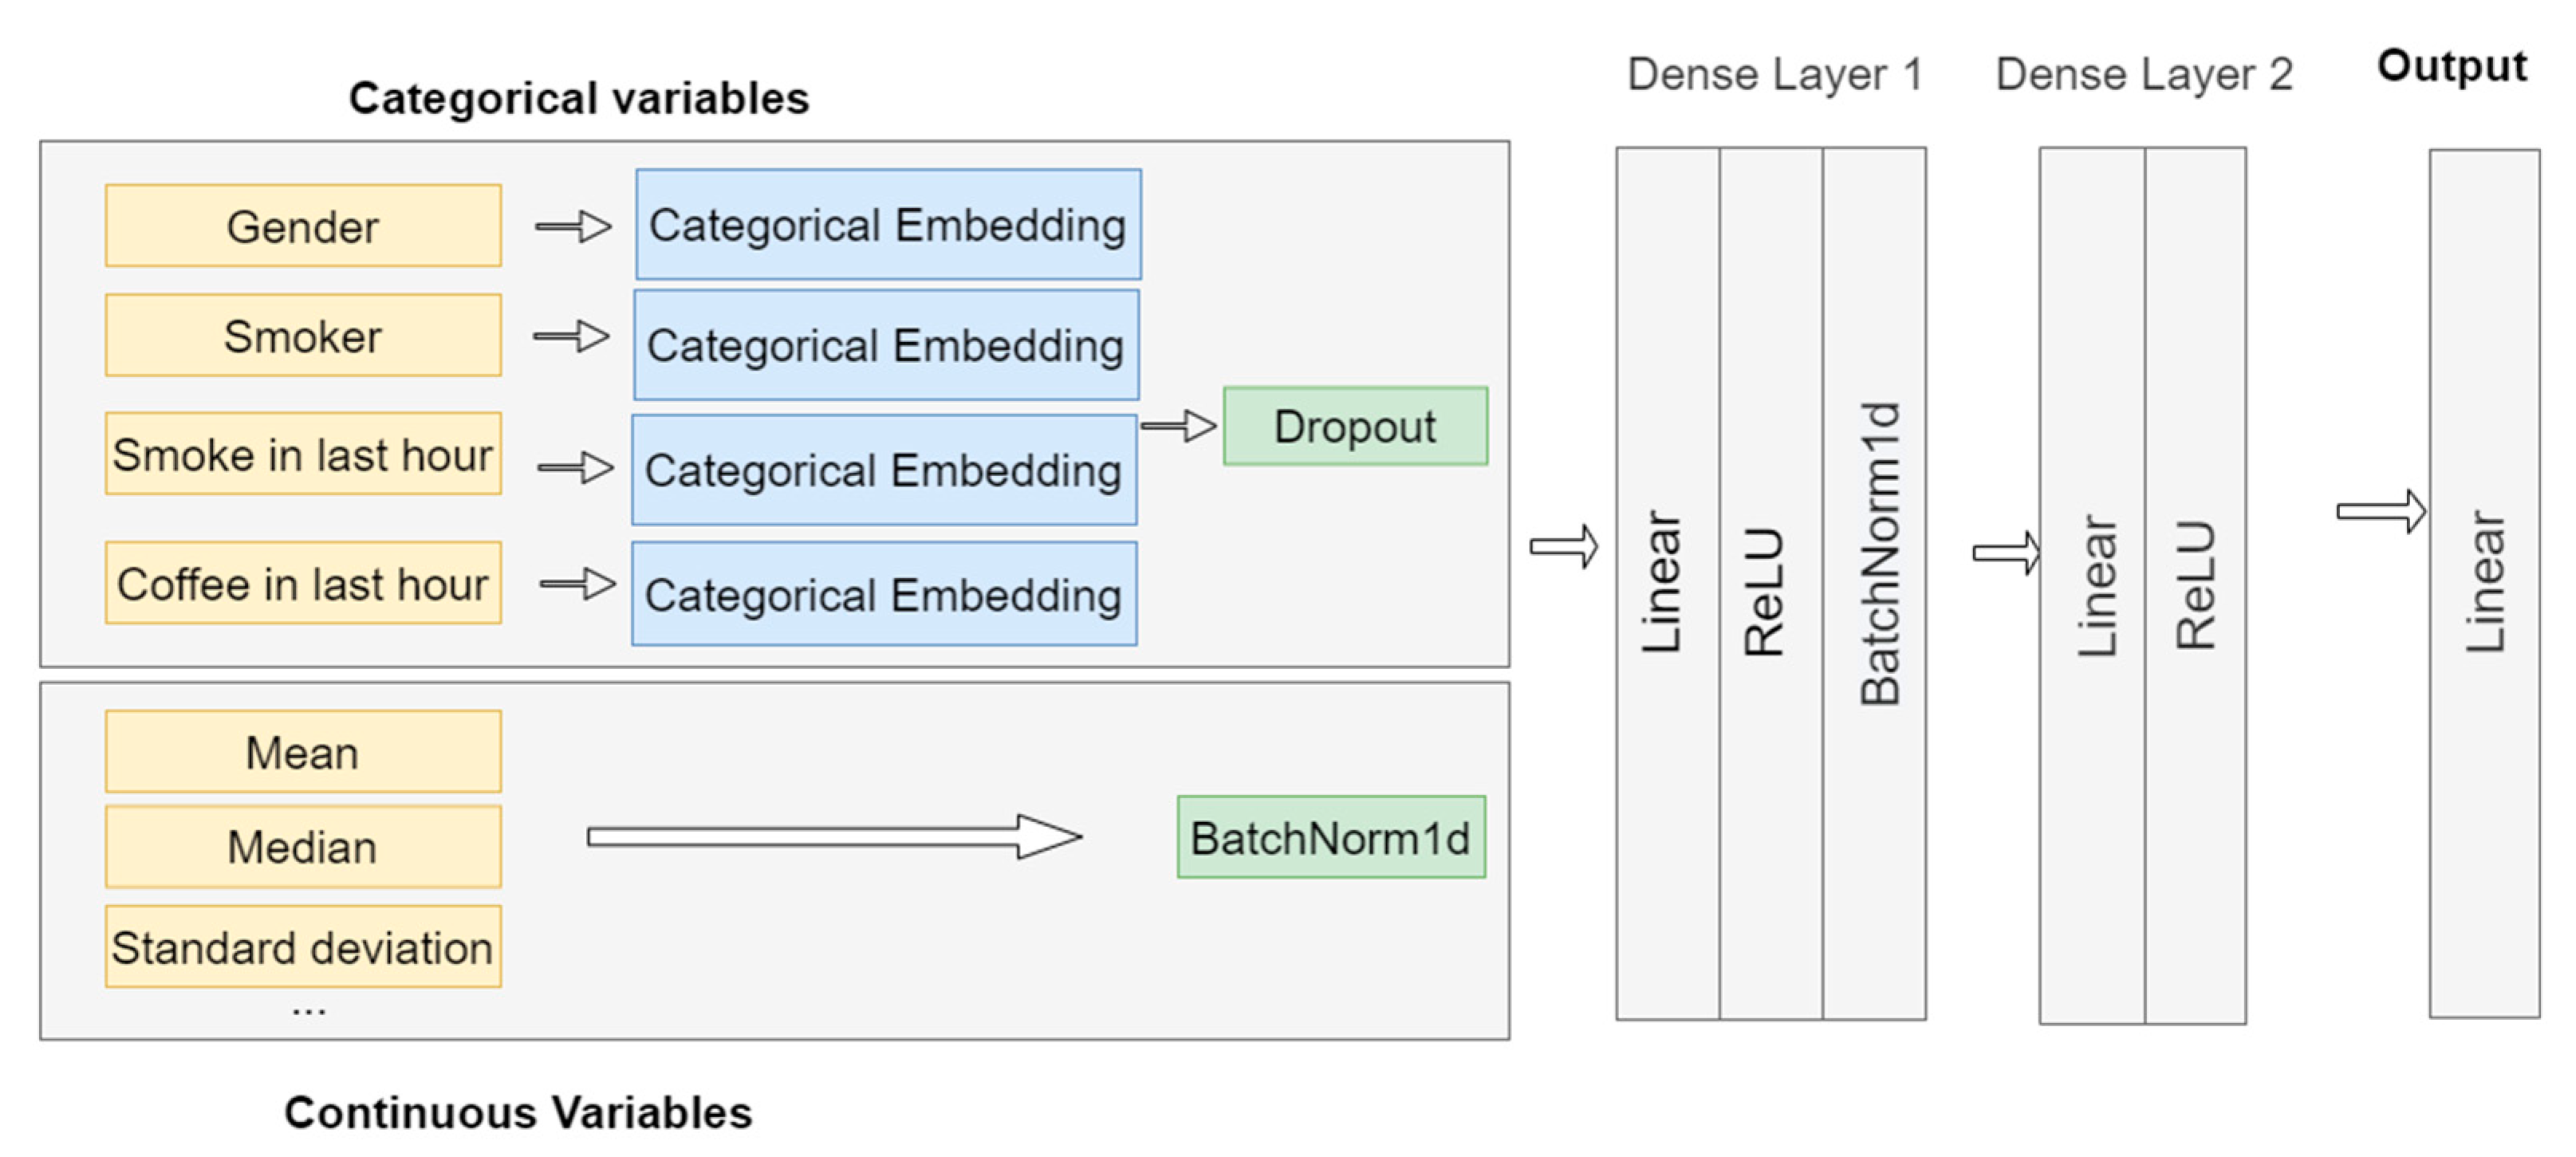

## Call libraries

In [2]:
# 1.0 Call libraries
import numpy as np
import pandas as pd
# 1.1 Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
# 1.2 sklearn for scaling data
from sklearn.preprocessing import MinMaxScaler
# 1.3 For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
# 1.4 Misc
import os

In [3]:
# 1.0.1
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
# 1.0.2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read Data

In [5]:
# 2.0 Read and show Kaggle's bikesharing data
#os.chdir("/home/ashok/.keras/datasets/bikesharing")
os.chdir("/gdrive/MyDrive/Colab_data_files/bikesharing/")
data = pd.read_csv('bike_sharing_daily.csv.zip', encoding='latin')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# 2.1 Data shape and types
print(data.shape)   # (731,16)
print(data.dtypes)

(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


## Display impt data features
Display grouped sums  
For our data also we will group by month, sum the hiring-cnts and display

In [7]:
# 2.2 Simple 'groupby()'' example. Only numeric columns will be summed up
dx = pd.DataFrame(
                   { 'a': ['a', 'a', 'b','b'],
                     'b' : [1,2,3,4],
                     'c' : ['aa','bb','cc','cc'],
                     'd' : [10,11,12,13]
                   }
                 )

dx
#  Use groupby to aggregate
#  Only numeric columns are aggregated
#  cat columns are left-out
dx.groupby('a').sum()

,a,b,c,d
0,a,1,aa,10
1,a,2,bb,11
2,b,3,cc,12
3,b,4,cc,13


,b,d
a,,
a,3,21
b,7,25


In [8]:
# 3. To simplify matters, We will concern ourselves to just two columns
#    Extract from our data, only two columns

df = data[['cnt','mnth']].copy()
df.head(3) 

,cnt,mnth
0,985,1
1,801,1
2,1349,1


In [9]:
# 3.1 We want to plot mnth vs total_cnt
# 3.1 Order this dataset by mnth for plotting. 

df = df.sort_values(by=['mnth'])
df.head()
#data_small_df.tail()

,cnt,mnth
0,985,1
368,2368,1
369,3272,1
370,4098,1
371,4521,1


### GroupBy and Plotting
We will plot month vs aggregate cnt  
Diff between `as_index = True vs as_index = False`

In [10]:
# 3.2 as_Index = True 
#     groupby with 'as_index = True'. 
#     'mnth' becomes an index. This is the default.

df_plot = df.groupby('mnth', as_index = True).agg('sum')
df_plot.columns = ['total_cnt']
df_plot.head()

,total_cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686


In [11]:
# 3.3 groupby with 'as_index = False'. 
#     This time 'mnth' is a column.
#      We want 'mnth' as a column

df_plot = df.groupby('mnth', as_index = False).sum()
df_plot.head()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686


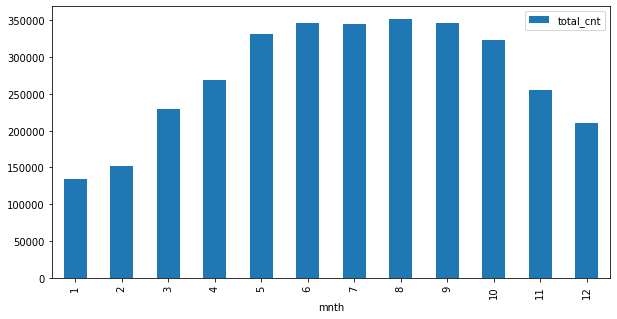

In [12]:
# 3.4 Plot the 'cnt' column of this dataset
#     Certain months have same behaviour:

# 3.4.1 Rename columns
df_plot.columns = ['mnth', 'total_cnt']

# 3.4.2 And plot
df_plot.plot.bar(
                  x= 'mnth',
                  y = 'total_cnt',
                  figsize=(10,5)
                ) ;

## Transform categories as wrod2vec

In [13]:
# 3.5 First, scale the 'cnt' column:

scaler = MinMaxScaler()
df['cnt'] = scaler.fit_transform(df[['cnt']])
df.head()

,cnt,mnth
0,0.110792,1
368,0.269903,1
369,0.373907,1
370,0.468937,1
371,0.517602,1


# Traditional Embeddings


### One Hot Encodings

In [ ]:
# 4.0 Transform 'mnth' column to dummy variable using pandas get_dummies()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
ohe = enc.fit_transform(df[['mnth']].values)
pd.DataFrame(ohe.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Hashing

In [ ]:
# 4.0.1
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=12, input_type= 'string')
f = h.transform(df['mnth'].astype('string'))  # fit() method exists but does nothing
d = pd.DataFrame(f.toarray())

In [ ]:
print(list(d.iloc[20,:]))
print(list(d.iloc[120, :]))
print(list(d.iloc[220, :]))

[0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0]


# Category Embeddings
Discovering relationships

In [14]:
# 4.1 Number of unique months:

df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
# 4.2 Just little transformation:

df['mnth'] = df['mnth']-1
df['mnth'] = df['mnth'].astype(int)

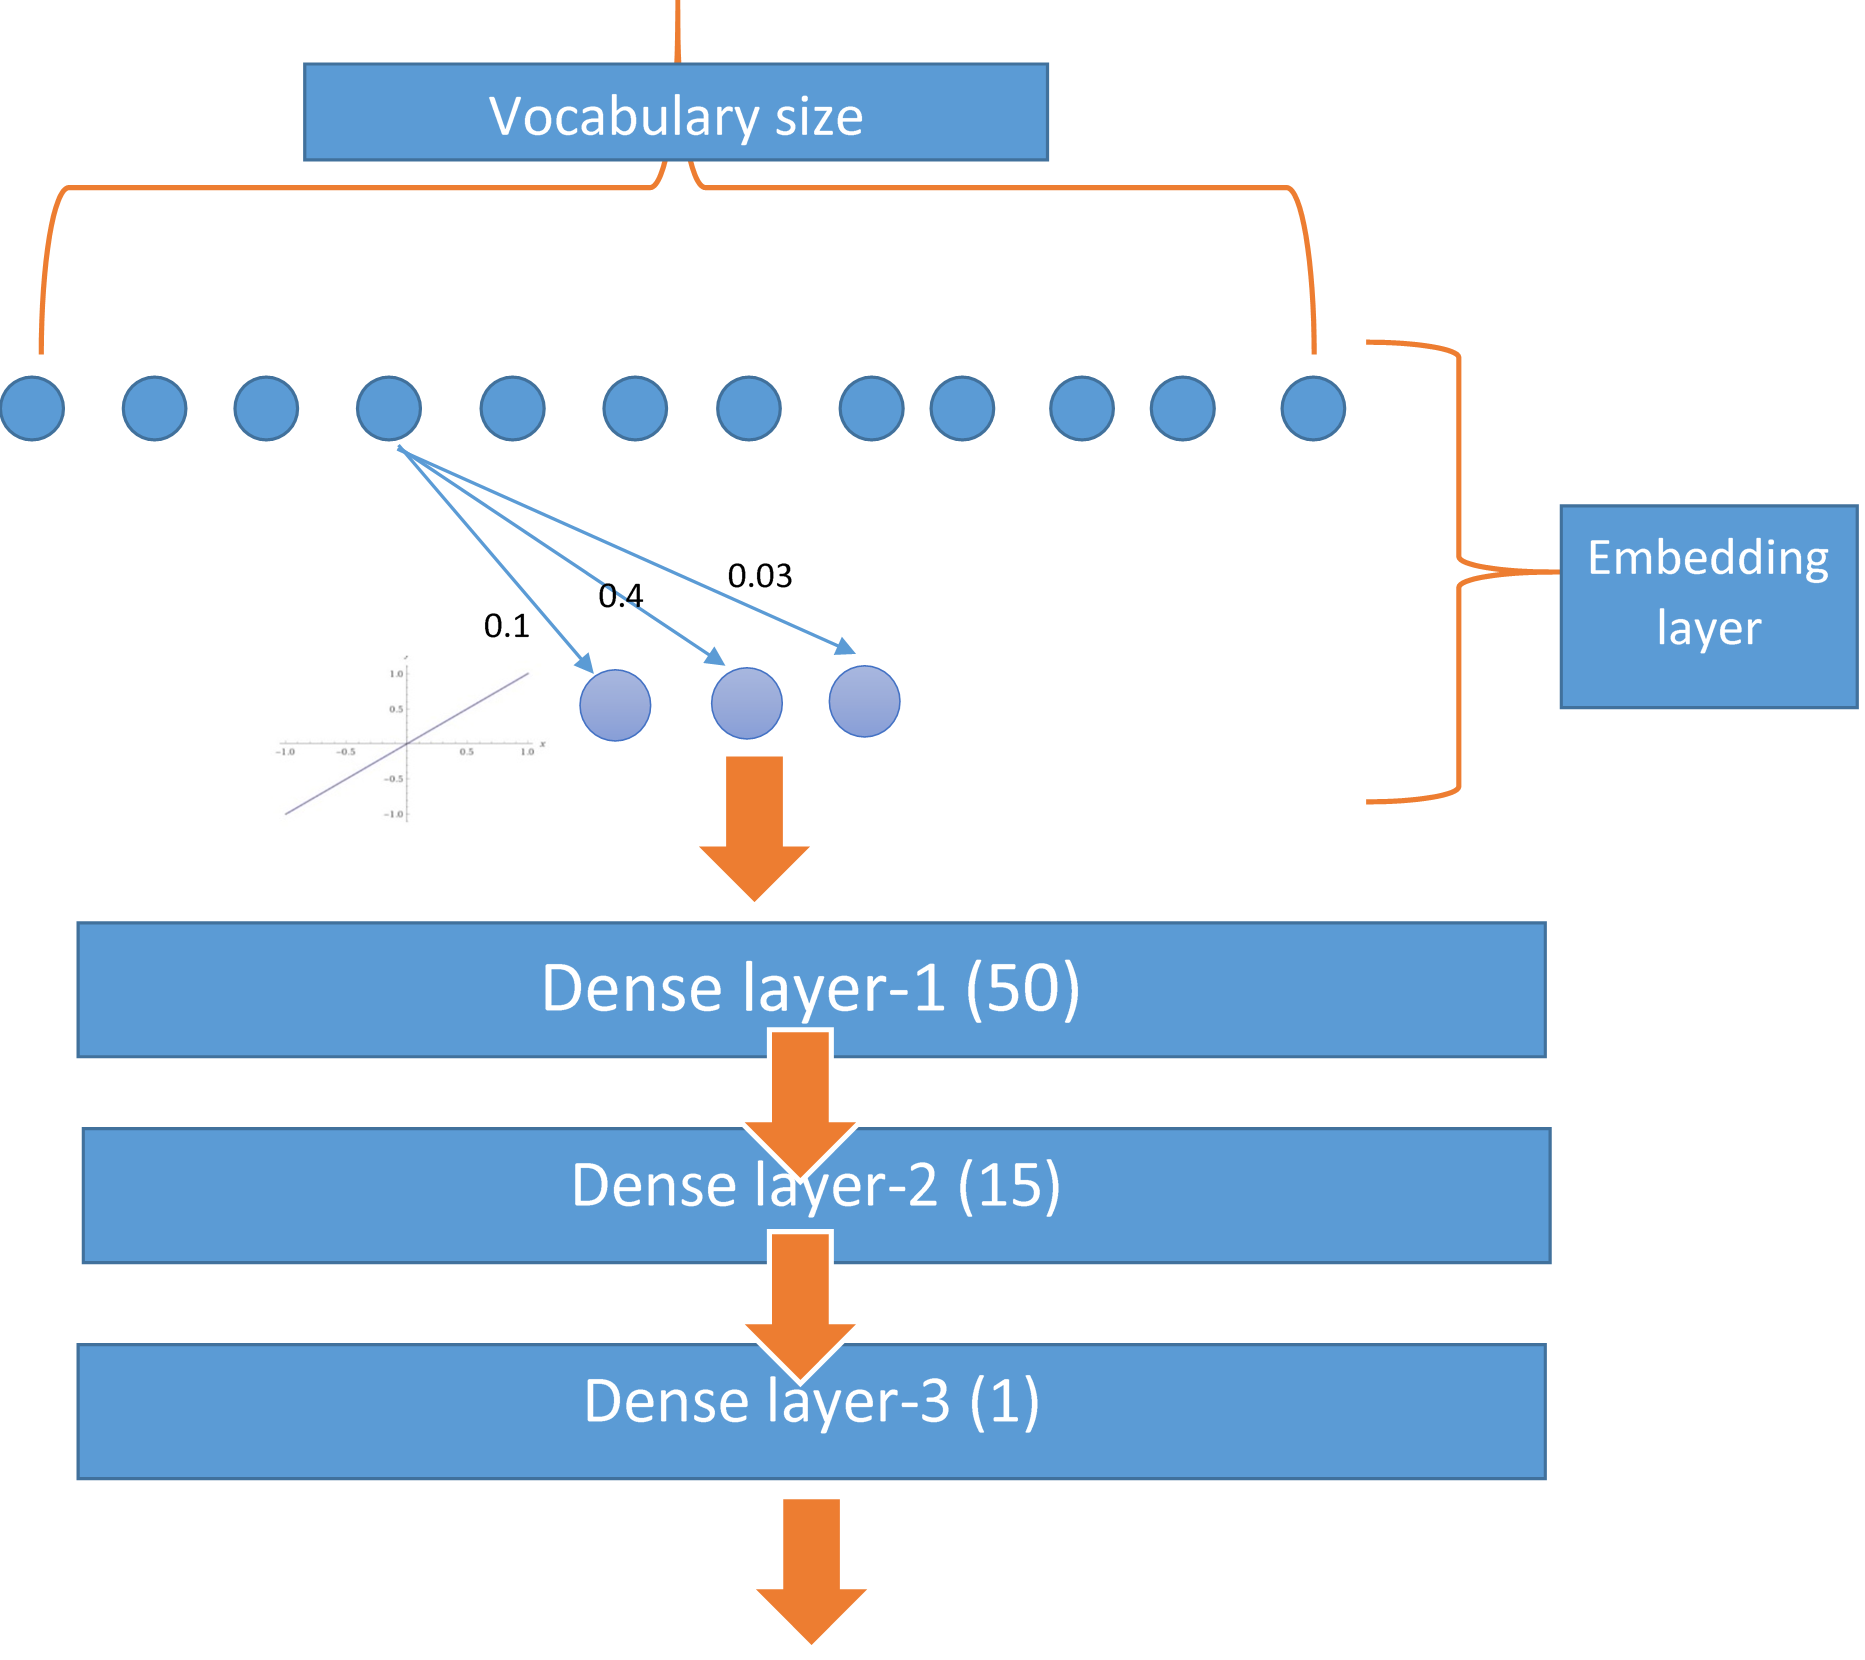

In [16]:
# 5.0 Getting embeddings for months now.
#     We use a simple NN:

embedding_size = 5
# 5.1 Our sequence input_length in each cell (per row) is just 1.
#     So  input_length = 1
model = Sequential()
model.add(Embedding(input_dim = 12,               # Vocabulary size of 12
                    output_dim = embedding_size,  # Vector size of 3
                    input_length = 1,             # A category, such as: ['sharp knife' ] 
                                                  # would have input_length of 2. But, 
                                                  # a category such as: ['knife'] would have
                                                  #  input_length of 1.
                    name="embedding"              # Layer name. We will later access it by this name
                   )
         )
model.add(Flatten())                        # Needs flattening as output is (embedding_size,1)
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))

In [17]:
# 5.1.1
model.compile(loss = "mse",
              optimizer = "adam",
              metrics=["accuracy"]
              )


# 5.1.2
model.fit(x = df['mnth'].values,
          y=  df['cnt'].values,
          epochs = 100,
          batch_size = 4
         )

Epoch 1/100
183/183 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.0000e+00
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.0014
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.0014
Epoch 4/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.0014
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.0014
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.0014
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.0014
Epoch 8/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.0014
Epoch 9/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.0014
Epoch 10/100
183/183 [==============================] - 0s 2ms/step - loss: 0.0317 - ac

In [ ]:
# 5.2 Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 5)              60        
_________________________________________________________________
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 6.0 Get embeddings layer weights"

# 6.0.1 First get the 'layer' object
e_layer = model.get_layer('embedding')


# 6.0.2 Then get e_layer's attributes
output_embeddings = e_layer.get_weights()

In [19]:
# 6.0.3
type(output_embeddings)     # It is a list that contains one array
print("\n=====")
print(len(output_embeddings))  # 1

list


=====
1


In [20]:
# 6.1
output_embeddings[0]     # Our weights array
print("\n============")
output_embeddings[0].shape  # (12,5)

array([[-0.2699952 , -0.20665795, -0.12558663, -0.22632752,  0.06051586],
       [-0.11904092, -0.14127596, -0.07024217, -0.2711827 , -0.0485496 ],
       [-0.13370535, -0.04465888,  0.00629129, -0.04881648, -0.05402705],
       [ 0.00719171,  0.02253026, -0.00133819,  0.01726688,  0.00565065],
       [ 0.08104794,  0.07690313,  0.00265319,  0.12681352, -0.02488133],
       [ 0.15685959,  0.10029005,  0.01720005,  0.1717218 , -0.01214009],
       [ 0.08980381,  0.12686397,  0.00466641,  0.1551533 , -0.040057  ],
       [ 0.10851179,  0.12061305,  0.00560446,  0.16615316, -0.03633202],
       [ 0.11205242,  0.11369283, -0.00950574,  0.19189452,  0.00371033],
       [ 0.07545012,  0.04420355,  0.01332005,  0.10919497, -0.0073952 ],
       [-0.03745223,  0.01805995,  0.01089418, -0.01679921,  0.02032616],
       [-0.12704211, -0.07878697, -0.02825463, -0.09471226, -0.03187468]],
      dtype=float32)

(12, 5)

In [21]:
# 6.2 Transform array to dataframe
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df

,0,1,2,3,4
0,-0.269995,-0.206658,-0.125587,-0.226328,0.060516
1,-0.119041,-0.141276,-0.070242,-0.271183,-0.048550
2,-0.133705,-0.044659,0.006291,-0.048816,-0.054027
3,0.007192,0.022530,-0.001338,0.017267,0.005651
4,0.081048,0.076903,0.002653,0.126814,-0.024881
5,0.156860,0.100290,0.017200,0.171722,-0.012140
6,0.089804,0.126864,0.004666,0.155153,-0.040057
7,0.108512,0.120613,0.005604,0.166153,-0.036332
8,0.112052,0.113693,-0.009506,0.191895,0.003710
9,0.075450,0.044204,0.013320,0.109195,-0.007395


## Clustering of weights
kmeans cluster will indicate which embeddings are near one another

### kmeans cluster

In [22]:
# 6.3 Perform Kmeans clustering to discover clusters
#     kmeans clustering will indicate, which embeddings
#     are relatively near one another:

from sklearn.cluster import  KMeans
km = KMeans(n_clusters= 4, n_init = 50)
km.fit(output_embeddings[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# 6.4  Our final dataframe
km.labels_

# 6.4.1 Create a new column of cluster labels:
output_embeddings_df['cluster'] = km.labels_

# 6.4.2
output_embeddings_df

array([2, 2, 0, 3, 1, 1, 1, 1, 1, 1, 3, 0], dtype=int32)

,0,1,2,3,4,cluster
0,-0.269995,-0.206658,-0.125587,-0.226328,0.060516,2
1,-0.119041,-0.141276,-0.070242,-0.271183,-0.048550,2
2,-0.133705,-0.044659,0.006291,-0.048816,-0.054027,0
3,0.007192,0.022530,-0.001338,0.017267,0.005651,3
4,0.081048,0.076903,0.002653,0.126814,-0.024881,1
5,0.156860,0.100290,0.017200,0.171722,-0.012140,1
6,0.089804,0.126864,0.004666,0.155153,-0.040057,1
7,0.108512,0.120613,0.005604,0.166153,-0.036332,1
8,0.112052,0.113693,-0.009506,0.191895,0.003710,1
9,0.075450,0.044204,0.013320,0.109195,-0.007395,1


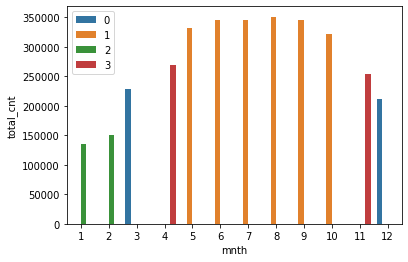

In [24]:
# 6.5 Also plot our grouped data:
import seaborn as sns
sns.barplot(data = df_plot,
            x = 'mnth',
            y = 'total_cnt',
            hue = km.labels_
            ) ;

### Clusterig using cosine similarity
Kinchit's idea 

In [26]:
# 7.0 Find cosine distance:
# Ref: https://stackoverflow.com/a/61450691   

X = output_embeddings[0] 
length = np.sqrt((X**2).sum(axis=1))[:,None]
X = X / length

# 7.1 Apply kmeans as per cosine distance:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

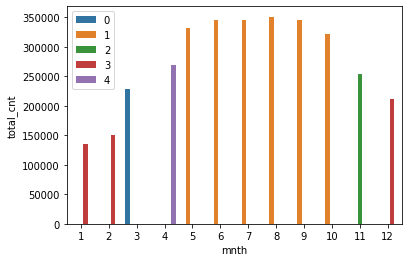

In [27]:
# 7.2 Next, plot our grouped data:

import seaborn as sns
sns.barplot(data = df_plot,
            x = 'mnth',
            y = 'total_cnt',
            hue = kmeans.labels_
            ) ;

### Similarity using correlation
Himanshu's idea  

For code See [here](https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas)

<Figure size 2160x720 with 0 Axes>

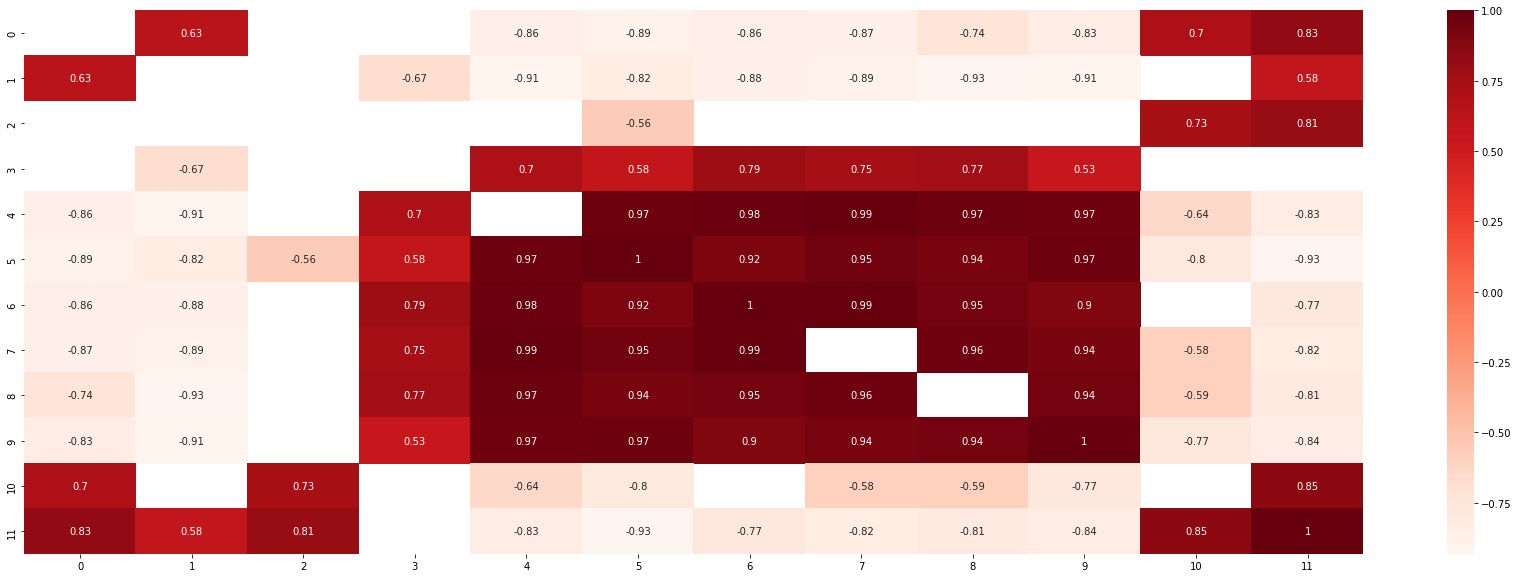

In [31]:
# 8.0 
dfCorr = pd.DataFrame(np.corrcoef(X))
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
########## DONE ######################

In [ ]:
# 6.3 Existing index becomes a column and a new index is added
output_embeddings_df.reset_index()

In [ ]:
# 6.4 reset_index() and update data frame
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.shape   # (12,4)

In [ ]:
# 6.5 Name columns
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
output_embeddings_df

# Vizualisation
Visualization of relationships

In [ ]:
# 6.6 Get three embeddings columns
output_embeddings_df.iloc[:,1:]

In [ ]:
# 7.0 Plot each vector on 3D axis
m = output_embeddings_df.iloc[:,1:].values
labels = output_embeddings_df.iloc[:,0:1].values
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()

In [ ]:
data_plot['cnt'].plot.bar(figsize=(10,5))

In [ ]:
output_embeddings_df

In [ ]:
########### I am Done ###############